## Importing the necessary libraries for our analysis.

In [172]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [173]:
#starting with loading the data into the program
data = pd.read_csv('train.csv')

In [174]:
data.shape

(550068, 12)

In [175]:
data

User_ID Product_ID Gender    Age  Occupation City_Category  \
0       1000001  P00069042      F   0-17          10             A   
1       1000001  P00248942      F   0-17          10             A   
2       1000001  P00087842      F   0-17          10             A   
3       1000001  P00085442      F   0-17          10             A   
4       1000002  P00285442      M    55+          16             C   
...         ...        ...    ...    ...         ...           ...   
550063  1006033  P00372445      M  51-55          13             B   
550064  1006035  P00375436      F  26-35           1             C   
550065  1006036  P00375436      F  26-35          15             B   
550066  1006038  P00375436      F    55+           1             C   
550067  1006039  P00371644      F  46-50           0             B   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [176]:
#information on the features from the column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [177]:
#getting the first look at the data
data.head()

User_ID Product_ID Gender   Age  Occupation City_Category  \
0  1000001  P00069042      F  0-17          10             A   
1  1000001  P00248942      F  0-17          10             A   
2  1000001  P00087842      F  0-17          10             A   
3  1000001  P00085442      F  0-17          10             A   
4  1000002  P00285442      M   55+          16             C   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          2               0                   3   
1                          2               0                   1   
2                          2               0                  12   
3                          2               0                  12   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                 NaN                 NaN      8370  
1                 6.0                14.0     15200  
2                 NaN                 NaN      1422  
3                14.0                 NaN      1057  
4                 NaN                 NaN      7969

In [178]:
#column names
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [179]:
#label encoding on the categorical columns
from sklearn.preprocessing import LabelEncoder

In [180]:
le = LabelEncoder()

In [181]:
data['User_ID'] = le.fit_transform(data['User_ID'])
data['Product_ID'] = le.fit_transform(data['Product_ID'])
print("Product_ID", le.classes_)
data['Gender'] = le.fit_transform(data['Gender'])
print("Gender", le.classes_)
data['Age'] = le.fit_transform(data['Age'])
print("Age", le.classes_)
data['City_Category'] = le.fit_transform(data['City_Category'])
print("City_Category", le.classes_)

Product_ID ['P00000142' 'P00000242' 'P00000342' ... 'P0099742' 'P0099842' 'P0099942']
Gender ['F' 'M']
Age ['0-17' '18-25' '26-35' '36-45' '46-50' '51-55' '55+']
City_Category ['A' 'B' 'C']


In [182]:
data

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
0             0         672       0    0          10              0   
1             0        2376       0    0          10              0   
2             0         852       0    0          10              0   
3             0         828       0    0          10              0   
4             1        2734       1    6          16              2   
...         ...         ...     ...  ...         ...            ...   
550063     5883        3567       1    5          13              1   
550064     5885        3568       0    2           1              2   
550065     5886        3568       0    2          15              1   
550066     5888        3568       0    6           1              2   
550067     5889        3566       0    4           0              1   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                               2               0                   3   
1                               2               0                   1   
2                               2               0                  12   
3                               2               0                  12   
4                              4+               0                   8   
...                           ...             ...                 ...   
550063                          1               1                  20   
550064                          3               0                  20   
550065                         4+               1                  20   
550066                          2               0                  20   
550067                         4+               1                  20   

        Product_Category_2  Product_Category_3  Purchase  
0                      NaN                 NaN      8370  
1                      6.0                14.0     15200  
2                      NaN                 NaN      1422  
3                     14.0                 NaN      1057  
4                      NaN                 NaN      7969  
...                    ...                 ...       ...  
550063                 NaN                 NaN       368  
550064                 NaN                 NaN       371  
550065                 NaN                 NaN       137  
550066                 NaN                 NaN       365  
550067                 NaN                 NaN       490  

[550068 rows x 12 columns]

In [183]:
data['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [184]:
 #changing all the values for 4+ to 4 
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].replace('4+', '4')

In [185]:
a = 'A'
int(a)

ValueError: invalid literal for int() with base 10: 'A'

In [ ]:
#changing the datatype from string to integer
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].astype(int)

In [186]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  int32  
 2   Gender                      550068 non-null  int32  
 3   Age                         550068 non-null  int32  
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  int32  
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 42.0+ MB


In [187]:
#checking the null values in the data
data.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [188]:
#since the data is large in size, filling the null values 
# data['Product_Category_2'] = data['Product_Category_2'].fillna(data['Product_Category_2'].mean())
# data['Product_Category_3'] = data['Product_Category_3'].fillna(data['Product_Category_3'].mean())

data = data.dropna()

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  int32  
 2   Gender                      166821 non-null  int32  
 3   Age                         166821 non-null  int32  
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  int32  
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int32(4), int64(5), object(1)
memory usage: 14.0+ MB


In [190]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [191]:
data.head(20)

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
1         0        2376       0    0          10              0   
6         3        1745       1    4           7              1   
13        4        1355       1    2          20              0   
14        5        2203       0    5           9              0   
16        5        3598       0    5           9              0   
18        6         362       1    3           1              1   
19        7        2382       1    2          12              2   
24        7        2909       1    2          12              2   
28        8         765       1    2          17              2   
29        9         833       0    3           1              1   
36        9        1722       0    3           1              1   
38        9        1459       0    3           1              1   
39        9        2105       0    3           1              1   
41        9        1020       0    3           1              1   
43        9        3577       0    3           1              1   
44        9        1391       0    3           1              1   
46        9        1041       0    3           1              1   
48       10        1017       0    2           1              2   
54       12        1719       1    4           1              2   
64       14         413       1    2           7              0   

   Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
1                           2               0                   1   
6                           2               1                   1   
13                          1               1                   1   
14                          1               0                   5   
16                          1               0                   2   
18                          1               1                   1   
19                          4               1                   1   
24                          4               1                   1   
28                          0               0                   5   
29                          4               1                   2   
36                          4               1                   2   
38                          4               1                   1   
39                          4               1                   1   
41                          4               1                   1   
43                          4               1                   2   
44                          4               1                   6   
46                          4               1                   1   
48                          1               0                   1   
54                          3               1                   1   
64                          1               0                   1   

    Product_Category_2  Product_Category_3  Purchase  
1                  6.0                14.0     15200  
6                  8.0                17.0     19215  
13                 2.0                 5.0     15665  
14                 8.0                14.0      5378  
16                 3.0                 4.0     13055  
18                14.0                16.0     11788  
19                 5.0                15.0     19614  
24                 8.0                14.0     11927  
28                 8.0                14.0      5391  
29                 4.0                 8.0     16352  
36                 4.0                 9.0     12909  
38                11.0                15.0     15212  
39                 2.0                 5.0     15705  
41                15.0                16.0     18963  
43                 4.0                 9.0     16406  
44                10.0                13.0     12642  
46                 6.0                 8.0     11562  
48                 2.0                 5.0     19327  
54                 5.0                 6.0     12107  
64                 2.0                 6.0    

In [192]:
data['Product_Category_2'].unique()

array([ 6.,  8.,  2.,  3., 14.,  5.,  4., 11., 15., 10.,  9., 13., 12.,
       16.])

In [193]:
#getting the five points summary/ basic statistical analysis
data.describe()

User_ID     Product_ID         Gender            Age  \
count  166821.000000  166821.000000  166821.000000  166821.000000   
mean     2956.922258    1471.491683       0.774645       2.455153   
std      1690.553079     942.668323       0.417817       1.335119   
min         0.000000       0.000000       0.000000       0.000000   
25%      1478.000000     745.000000       1.000000       2.000000   
50%      3019.000000    1334.000000       1.000000       2.000000   
75%      4367.000000    2106.000000       1.000000       3.000000   
max      5890.000000    3630.000000       1.000000       6.000000   

          Occupation  City_Category  Marital_Status  Product_Category_1  \
count  166821.000000  166821.000000   166821.000000       166821.000000   
mean        8.178886       1.087159        0.402839            2.742766   
std         6.487522       0.759824        0.490470            2.573969   
min         0.000000       0.000000        0.000000            1.000000   
25%         2.000000       1.000000        0.000000            1.000000   
50%         7.000000       1.000000        0.000000            1.000000   
75%        14.000000       2.000000        1.000000            4.000000   
max        20.000000       2.000000        1.000000           15.000000   

       Product_Category_2  Product_Category_3       Purchase  
count       166821.000000       166821.000000  166821.000000  
mean             6.896871           12.668243   11658.114980  
std              4.500288            4.125338    5082.287959  
min              2.000000            3.000000     185.000000  
25%              2.000000            9.000000    7869.000000  
50%              6.000000           14.000000   11756.000000  
75%             10.000000           16.000000   15626.000000  
max             16.000000           18.000000   23959.000000

In [194]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

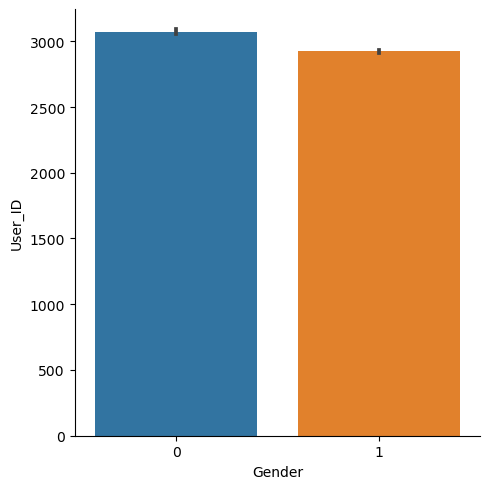

In [195]:
#visualizations to understand the distribution of the various features
sns.catplot(data=data, x='Gender', y='User_ID', kind='bar')
plt.show()

### Amongst all the purshases made, the purchases  made by Female are higher as compared to Male

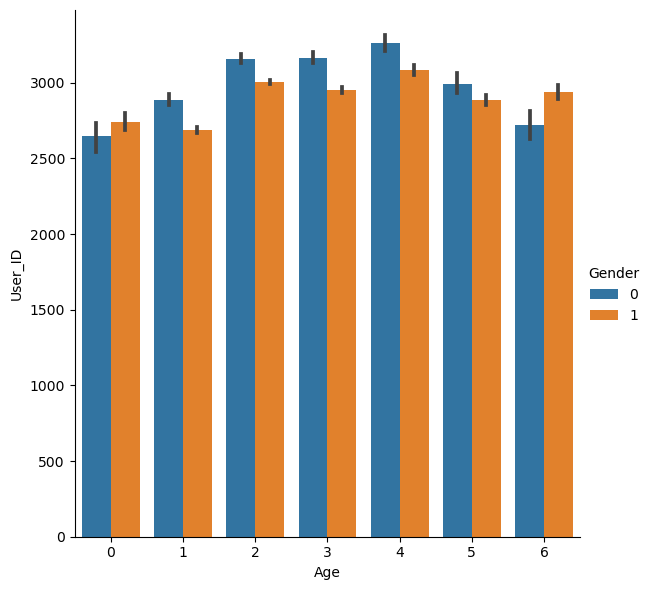

In [196]:
sns.catplot(data=data, x='Age', y='User_ID', hue='Gender', kind='bar', height=6)
plt.show()

In [197]:
data['Gender'].value_counts()

1    129227
0     37594
Name: Gender, dtype: int64

###Inferences from the Plot:
1. The most frequent purchases came from the females having user ids that belong to age category 4(36-45)
2. The least frequent purchases came from the males of the age category 1(18-25), and females of age category 0(0-17). 

In [198]:
sns.catplot(data=data, x='Marital_Status', y='User_ID', hue='Gender', kind='bar', height=6)
plt.show()

### the gender ratio in unmarried customers is almost similar, whereas the married customers have a sightly higher number of females in the lot. 

In [199]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### The product_category_1 sees a great rise of product category 1 and diminishes with the other products. The other considerable categories are 5, 2, 3, 6, 8, etc.

In [200]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_2'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### Product_Category_2 sees a considerate balance among categories. With category 2 topping the charts, and other considerable categories are 8, ,4,5,6,14,15,etc.

In [201]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_3'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### For product_category_3, the balance is towards the end with 16 topping the charts, and other considerable categories are 15, 14, 5, 8, 9, 17, etc.

In [202]:
plt.figure(figsize=(10,5))
sns.countplot(data['Occupation'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


### occupation also sees a constant balance with 4 topping the chart, and other categories in the considerable amount with 0,1,2,7,12,17,20.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


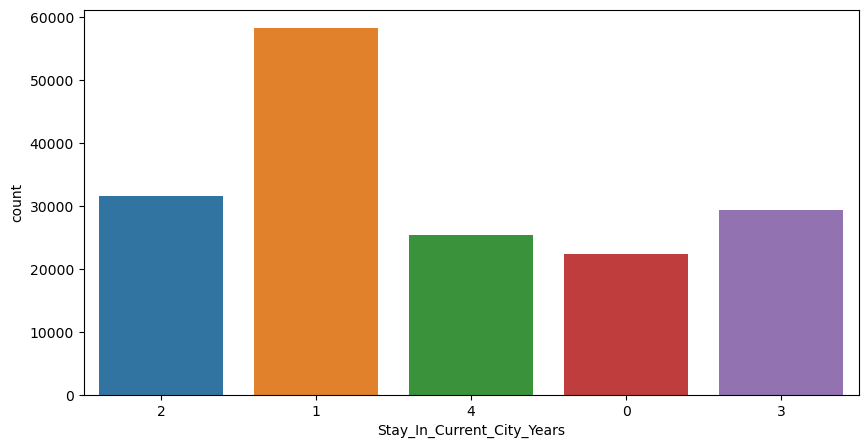

In [203]:
plt.figure(figsize=(10,5))
sns.countplot(data['Stay_In_Current_City_Years'])
plt.show()

### Majority of the customers have stayed a year in the city.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


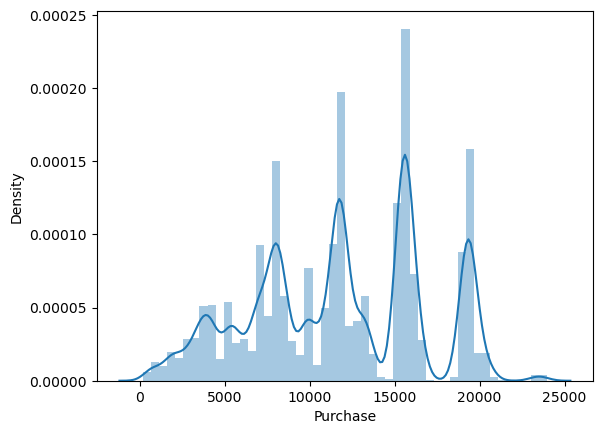

In [204]:
sns.distplot(data['Purchase'])
plt.show()

### Purchases is not accumulated in a range, rather varies in different intervals. 

In [205]:
#checking the correlation of the features
corr_spearman = data.corr()
corr_pearson = data.corr(method='pearson')
corr_kendall = data.corr(method='kendall')

C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:5215: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


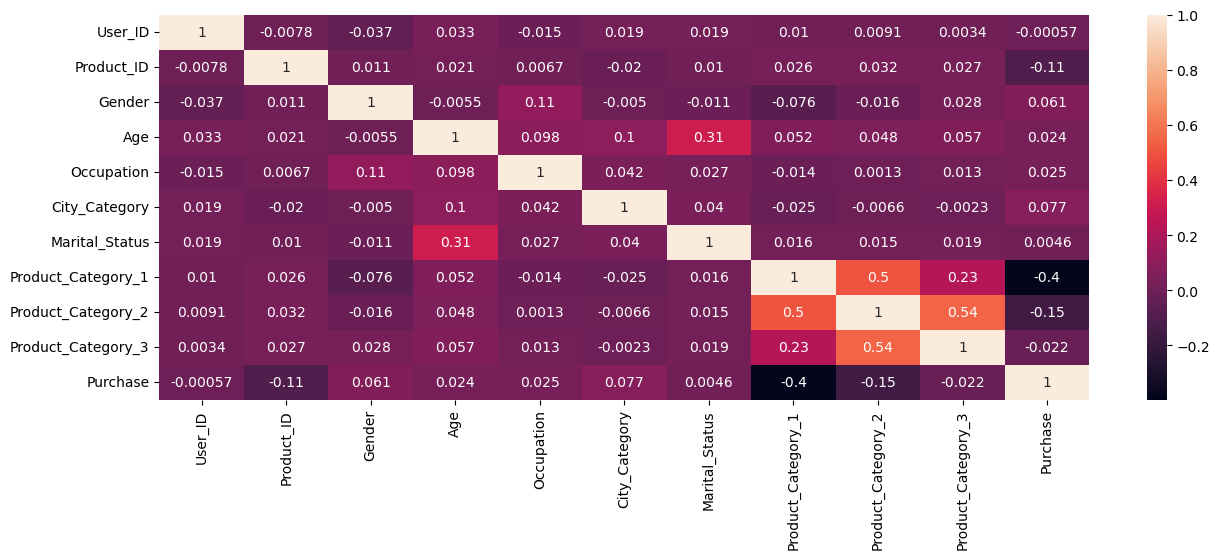

In [206]:
#spearman correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_spearman, annot=True)
plt.show()

In [207]:
#kendall correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_kendall, annot=True)

<AxesSubplot:>

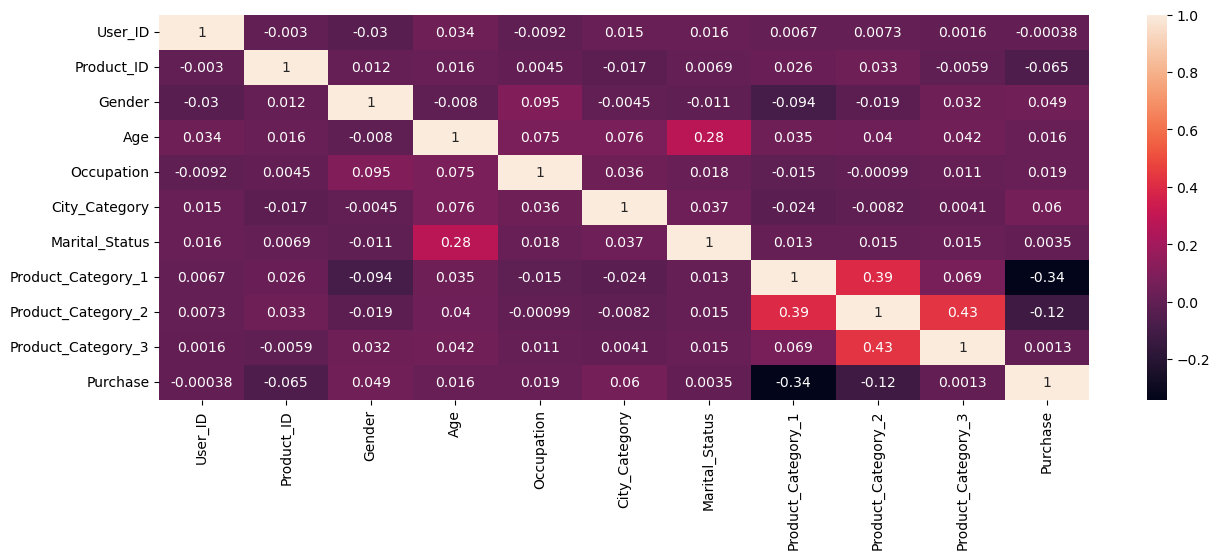

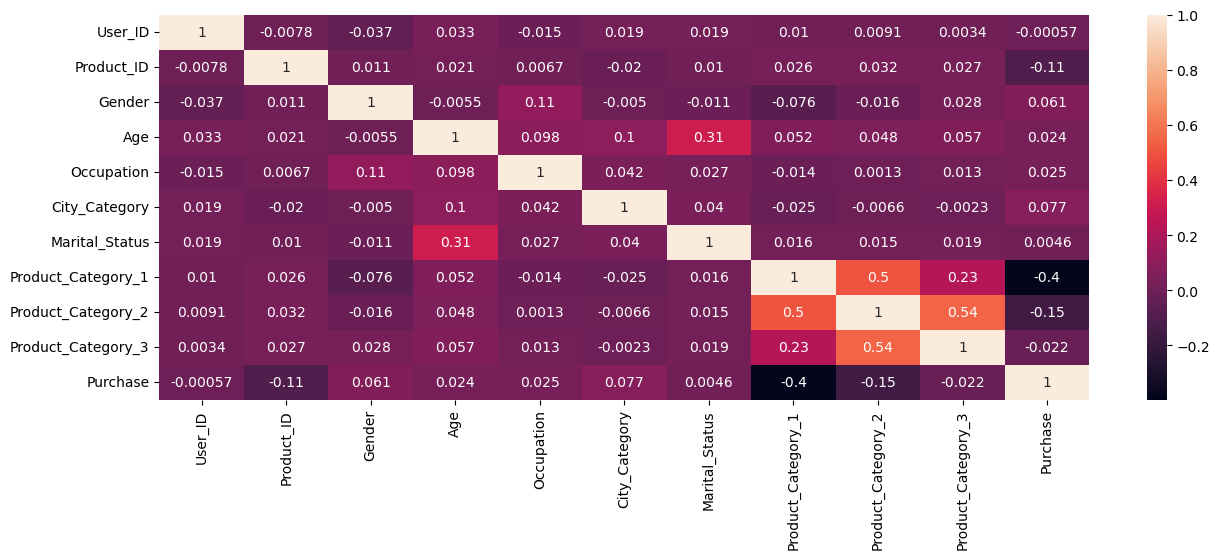

In [208]:
#pearson correlation
plt.figure(figsize=(15,5))
sns.heatmap(corr_pearson, annot=True)
plt.show()

## Statistical Analysis 

### One Sample Test For Mean 
let's Suppose, it was observed that the average purchase made by the Men of the age 18-25 was 10000. Is it still the same? 

In [209]:
#null hypothesis - The mean is 10000
#alternate hypothesis - The mean is not 10000

In [210]:
data['Age'].unique()

array([0, 4, 2, 5, 3, 1, 6])

In [211]:
data['Gender'].unique()

array([0, 1])

In [212]:
new_data = data.loc[(data['Age'] == 1) & data['Gender'] == 1]

In [213]:
new_data

User_ID  Product_ID  Gender  Age  Occupation  City_Category  \
98           21        3370       1    1          15              0   
103          21        2507       1    1          15              0   
111          21        2150       1    1          15              0   
127          24        1957       1    1           4              2   
128          24         458       1    1           4              2   
...         ...         ...     ...  ...         ...            ...   
545425     5814         338       1    1           5              1   
545427     5814        1832       1    1           5              1   
545428     5814        1518       1    1           5              1   
545430     5814        1538       1    1           5              1   
545438     5814        1413       1    1           5              1   

       Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
98                              4               0                   1   
103                             4               0                   1   
111                             4               0                   2   
127                             4               0                   1   
128                             4               0                   1   
...                           ...             ...                 ...   
545425                          1               0                   1   
545427                          1               0                   2   
545428                          1               0                   2   
545430                          1               0                   2   
545438                          1               0                  11   

        Product_Category_2  Product_Category_3  Purchase  
98                     8.0                17.0     12099  
103                   11.0                16.0     12098  
111                    4.0                15.0      9564  
127                    5.0                 9.0     15361  
128                    2.0                15.0     15770  
...                    ...                 ...       ...  
545425                14.0                16.0     15420  
545427                 3.0                 4.0     15973  
545428                15.0                16.0      6847  
545430                 4.0                 5.0     13276  
545438                13.0                16.0      3125  

[24239 rows x 12 columns]

In [214]:
new_data.shape

(24239, 12)

In [215]:
sample_size = 1000
sample = new_data.sample(sample_size, random_state=0)

In [216]:
new_data.mean()

User_ID                       2.687058e+03
Product_ID                    1.427862e+03
Gender                        1.000000e+00
Age                           1.000000e+00
Occupation                    7.085193e+00
City_Category                 1.064483e+00
Stay_In_Current_City_Years             inf
Marital_Status                1.950163e-01
Product_Category_1            2.477124e+00
Product_Category_2            6.571847e+00
Product_Category_3            1.247176e+01
Purchase                      1.185285e+04
dtype: float64

In [217]:
pos_mean = 11852

In [218]:
sample_mean = sample['Purchase'].mean()
print(sample_mean)

11806.467


In [219]:
#one sample t-test
from scipy.stats import ttest_1samp

In [220]:
t_stat, p_value = ttest_1samp(sample['Purchase'], pos_mean)
print(t_stat, p_value)

-0.2826842625898287 0.7774774400634757


In [221]:
# P-value is less than 0.05, reject the null hypothesis. 
# Null Hypothesis will be accepted
# therefore, the mean purchase for men aged 18-25 is 10000. 

### One Sample Test for Proportion
Let's Suppose, It was observed that the percentage of women that spend more than 10000 was 35%. Is it still the same?

In [222]:
#null hypothesis - proportion is 35%.
#alternate hypothesis - proportion is not 35%. 

data_new = data.loc[(data['Purchase'] > 10000)]

In [223]:
data_new.shape

(102477, 12)

In [224]:
data_new['Gender'].value_counts()

1    81353
0    21124
Name: Gender, dtype: int64

In [225]:
#No of women in the sample
count = data_new['Gender'].value_counts()[0]

In [226]:
count

21124

In [227]:
#number of observations
nobs = len(data_new['Gender'])

In [228]:
nobs

102477

In [229]:
#hypothesised value
p0 = 0.35

In [231]:
data_new['Gender'].value_counts()[0]/nobs

0.2061340593499029

In [233]:
#one sample z test
from statsmodels.stats.proportion import proportions_ztest

In [234]:
z_stat, p_val = proportions_ztest(count=count, 
                                  nobs=nobs, 
                                  value=p0, 
                                  alternative="two-sided", 
                                  prop_var=False)
print(z_stat, p_val)

-113.84729816907917 0.0


In [ ]:
#p-value is less than 0.05, reject the null hypothesis. 
#the proportion of women spending more than 10000, is not 35%. 

### Two Sample test for Means
Is the average purchase made by men and women of the age 18-25 same?

In [239]:
# 1. By performing t test, where we can compare means of both the groups
# 2. By performing f test, where we can compare variances of both the groups

In [235]:
#null hypothesis - average spends are equal 
#alternate hypothesis - average spends are not equal

data_men = data.loc[(data['Gender'] == 1)& (data['Age'] == 1)]
data_women = data.loc[(data['Gender'] == 0) & (data['Age'] == 1)]

In [236]:
#creating samples
data_men_sample = data_men.sample(500, random_state=0)
data_women_sample = data_women.sample(500, random_state=0)

In [237]:
#checking variances of the two samples
print(data_men_sample.Purchase.var())
print(data_women_sample.Purchase.var())

25667399.361122195
25521524.106817614


In [238]:
#sample means 
print(data_men_sample.Purchase.mean())
print(data_women_sample.Purchase.mean())

11767.16
10829.414


In [241]:
#two sample t-test for unequal variances
from scipy.stats import ttest_ind

t_stat_2, p_val_2 = ttest_ind(data_men_sample.Purchase, data_women_sample.Purchase, equal_var=False)
print(t_stat_2, p_val_2)

2.930773286720701 0.0034582632769889553


In [ ]:
#we can reject the null hypothesis using the test statistic and since p-value is less than 0.05.
#the average purchases are not the same. 

### Two Sample test for Proportion
Is the percentage of men who have spend more than 10000 same for the ages 18-25 and 26-35

In [242]:
#null hypothesis - Percentage of the men in the age groups is same
#alternate hypothesis - Percentage of the men in the age groups is not same

data_age1 = data.loc[(data['Age'] == 1) & (data['Purchase'] > 10000)]
data_age2 = data.loc[(data['Age'] == 2) & (data['Purchase'] > 10000)]

In [244]:
len(data_age1), len(data_age2)

(19262, 40994)

In [245]:
data_age1_sample = data_age1.sample(1000, random_state=0)
data_age2_sample = data_age2.sample(1000, random_state=0)

In [246]:
count = [(data_age1_sample['Gender'] == 1).sum(), (data_age2_sample['Gender'] == 1).sum()]

nobs = [(len(data_age1_sample)), len(data_age2_sample)]

In [247]:
from statsmodels.stats.proportion import proportions_ztest
stat_2sample, p_value_2sample = proportions_ztest(count=count, 
                                                  nobs=nobs, 
                                                  value=0, 
                                                  alternative='two-sided',
                                                  prop_var=False)

In [248]:
print(stat_2sample, p_value_2sample)

-1.5165009817767297 0.12939272225896914


In [ ]:
#p value is more than 0.05, cannot reject the null hypthesis. 
# Null hypothesis is accepted
#therefore, Percentage of the men in  both the age groups who have spent more than 10000 is same

In [250]:
plt.figure(figsize=(10,5))
sns.countplot(data['Product_Category_1'])
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Figure size 1000x500 with 0 Axes>

In [ ]:
!pip install matplotlib

In [ ]:
! pip install seaborn